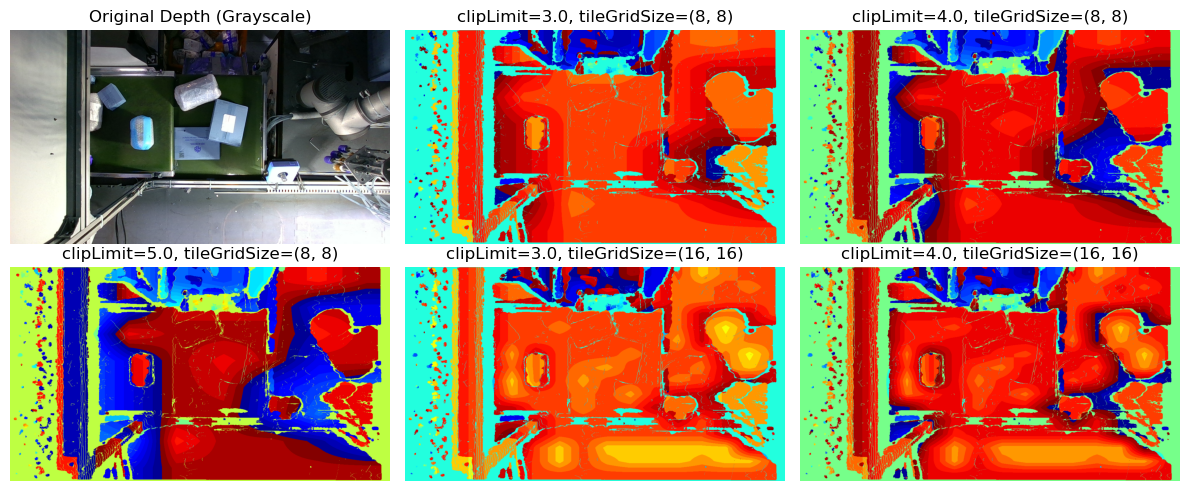

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Đường dẫn ảnh ===
path = "/Users/angelinacu/Desktop/Study/Viettel /ThiSinh/train/depth/0047.png"
path_rgb = "/Users/angelinacu/Desktop/Study/Viettel /ThiSinh/train/rgb/0047.png"

# === 2. Đọc ảnh depth ===
depth = cv2.imread(path, cv2.IMREAD_UNCHANGED)
rgb = cv2.imread(path_rgb)

# Nếu ảnh có 3 kênh -> chuyển về grayscale
if len(depth.shape) == 3:
    depth = cv2.cvtColor(depth, cv2.COLOR_BGR2GRAY)

# === 3. Chuẩn hóa ảnh [0,1] ===
depth_norm = depth.astype(np.float32) / np.max(depth)
depth_8bit = (depth_norm * 255).astype(np.uint8)
depth_factor = 4

# Histogram Equalization 1
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
depth_norm = clahe.apply(depth_8bit)
depth_deep = np.power(depth_norm, 1 / depth_factor)
depth_encoded = (depth_deep * 255).astype(np.uint8)
depth_colored = cv2.applyColorMap(depth_encoded, cv2.COLORMAP_JET)
depth_colored = cv2.cvtColor(depth_colored, cv2.COLOR_BGR2RGB)

# Histogram Equalization 2
clahe1 = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
depth_norm1 = clahe1.apply(depth_8bit)  
depth_deep1 = np.power(depth_norm1, 1 / depth_factor)
depth_encoded1 = (depth_deep1 * 255).astype(np.uint8)
depth_colored1 = cv2.applyColorMap(depth_encoded1, cv2.COLORMAP_JET)
depth_colored1 = cv2.cvtColor(depth_colored1, cv2.COLOR_BGR2RGB)

# Histogram Equalization 2
clahe2 = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
depth_norm2 = clahe2.apply(depth_8bit)
depth_deep2 = np.power(depth_norm2, 1 / depth_factor)
depth_encoded2 = (depth_deep2 * 255).astype(np.uint8)
depth_colored2 = cv2.applyColorMap(depth_encoded2, cv2.COLORMAP_JET)
depth_colored2 = cv2.cvtColor(depth_colored2, cv2.COLOR_BGR2RGB)

# Histogram Equalization 3
clahe3 = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(16, 16))
depth_norm3 = clahe3.apply(depth_8bit) 
depth_deep3 = np.power(depth_norm3, 1 / depth_factor)
depth_encoded3 = (depth_deep3 * 255).astype(np.uint8)
depth_colored3 = cv2.applyColorMap(depth_encoded3, cv2.COLORMAP_JET)
depth_colored3 = cv2.cvtColor(depth_colored3, cv2.COLOR_BGR2RGB)

# Histogram Equalization 4
clahe4 = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16, 16))
depth_norm4 = clahe4.apply(depth_8bit) 
depth_deep4 = np.power(depth_norm4, 1 / depth_factor)
depth_encoded4 = (depth_deep4 * 255).astype(np.uint8)
depth_colored4 = cv2.applyColorMap(depth_encoded4, cv2.COLORMAP_JET)
depth_colored4 = cv2.cvtColor(depth_colored4, cv2.COLOR_BGR2RGB)

# === 7. Hiển thị bằng matplotlib ===
plt.figure(figsize=(12, 5))

plt.subplot(2, 3, 1)
plt.imshow(rgb)
plt.title("Original Depth (Grayscale)")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(depth_colored)
plt.title(f"clipLimit=3.0, tileGridSize=(8, 8)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(depth_colored1)
plt.title(f"clipLimit=4.0, tileGridSize=(8, 8)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(depth_colored2)
plt.title(f"clipLimit=5.0, tileGridSize=(8, 8)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(depth_colored3)
plt.title(f"clipLimit=3.0, tileGridSize=(16, 16)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(depth_colored4)
plt.title(f"clipLimit=4.0, tileGridSize=(16, 16)")
plt.axis('off')


plt.tight_layout()
plt.show()


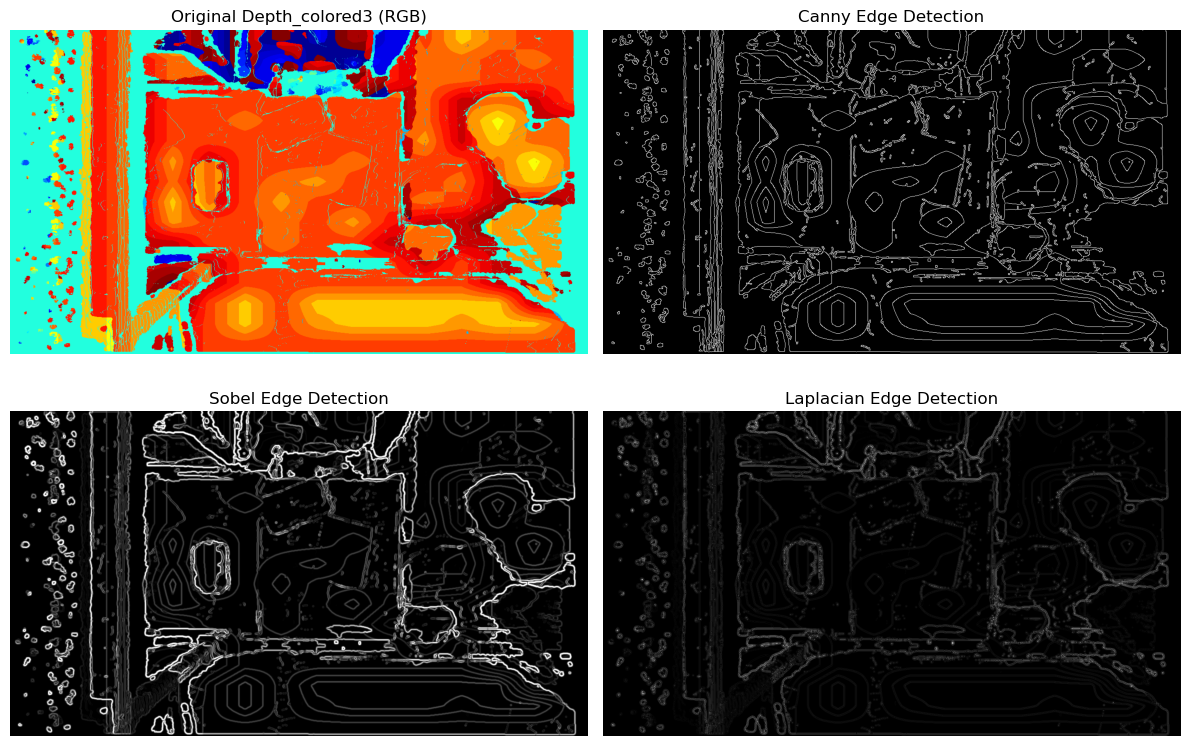

In [8]:
# === 2. Chuyển ảnh màu về grayscale để lọc biên ===
gray = cv2.cvtColor(depth_colored3, cv2.COLOR_RGB2GRAY)

# Làm mượt ảnh để giảm nhiễu
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# === 3. Các phương pháp lọc biên ===

# Canny Edge Detection
edges_canny = cv2.Canny(gray_blur, 30, 100)

# Sobel Edge Detection
sobelx = cv2.Sobel(gray_blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_blur, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = cv2.magnitude(sobelx, sobely)
edges_sobel = cv2.convertScaleAbs(edges_sobel)

# Laplacian Edge Detection
edges_lap = cv2.Laplacian(gray_blur, cv2.CV_64F)
edges_lap = cv2.convertScaleAbs(edges_lap)

# === 4. Hiển thị kết quả so sánh ===
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(depth_colored3)
plt.title("Original Depth_colored3 (RGB)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(edges_canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges_sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges_lap, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.tight_layout()
plt.show()